In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings ("ignore")

In [29]:
df = pd.read_csv("Births_Data.csv", index_col=[0], parse_dates=[0] )

In [30]:
df.head()

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892


In [31]:
df.tail()

,births
date,
2015-12-27,7518
2015-12-28,13100
2015-12-29,13458
2015-12-30,13100
2015-12-31,11608


In [32]:
df.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


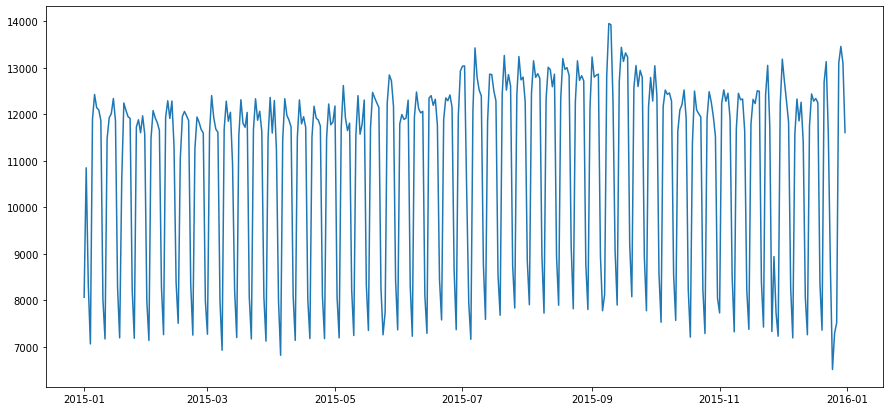

In [33]:
plt.figure (figsize=(15,7))
plt.plot(df);

In [34]:
mov_avg = df.rolling(window=20).mean()

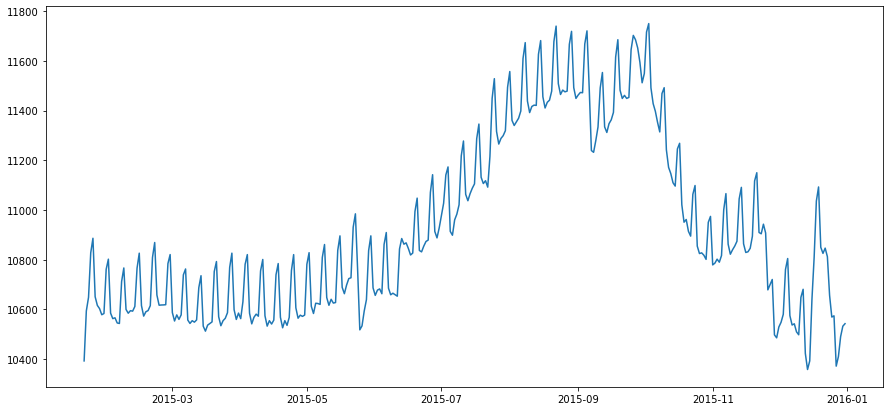

In [35]:
plt.figure (figsize=(15,7))
plt.plot(mov_avg);

In [36]:
df_mod=pd.concat([df,df.shift(1)],axis=1)

In [37]:
df_mod.head()

,births,births
date,,
2015-01-01,8068,NaN
2015-01-02,10850,8068.0
2015-01-03,8328,10850.0
2015-01-04,7065,8328.0
2015-01-05,11892,7065.0


In [38]:
df_mod=df_mod.drop("2015-01-01", axis=0)

In [39]:
df_mod.head()

,births,births
date,,
2015-01-02,10850,8068.0
2015-01-03,8328,10850.0
2015-01-04,7065,8328.0
2015-01-05,11892,7065.0
2015-01-06,12425,11892.0


In [40]:
df_mod.columns = ["Actual_Births", "Forcasted_Births"]
df_mod.head()

,Actual_Births,Forcasted_Births
date,,
2015-01-02,10850,8068.0
2015-01-03,8328,10850.0
2015-01-04,7065,8328.0
2015-01-05,11892,7065.0
2015-01-06,12425,11892.0


In [41]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np

In [42]:
# Building base line model

model_err = mse(df_mod["Actual_Births"], df_mod["Forcasted_Births"])
model_err

5162403.576923077

In [43]:
np.sqrt(model_err) # error using base line model

2272.092334594498

In [44]:
# Creating ARIMA (Autoregressive {p} Integrated {d} Moving Average {q}) Model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

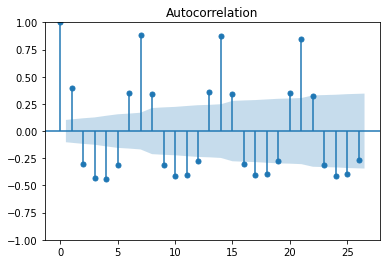

In [45]:
plot_acf(df); # to identify q value

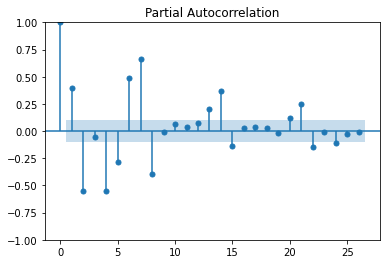

In [46]:
plot_pacf(df); # to identify p value

In [47]:
df.size

365

In [48]:
df_train = df[:330]
df_test = df[330:]

In [49]:
df_test.size

35

In [50]:
df_train.size

330

In [51]:
model = ARIMA(df_train, order = (2,1,3))
model_fitting=model.fit()
model_fitting.aic

5748.0242917254545

Lower the aic value, better the model.

In [52]:
for i in range (1,6):
    for j in range (1,3):
        for k in range (1,6):
            model_check = ARIMA(df_train, order = (i,j,k))
            model_check_fitting=model_check.fit()
            print(i,j,k,model_check_fitting.aic)

1 1 1 5968.274019601455
1 1 2 5819.043115926388
1 1 3 5798.322826007823
1 1 4 5703.737211352322
1 1 5 5721.767823249538
1 2 1 6011.47303977853
1 2 2 5961.287258684117
1 2 3 5818.935015526433
1 2 4 5822.831572945774
1 2 5 5895.565883783049
2 1 1 5919.450810676119
2 1 2 5794.23340107737
2 1 3 5748.0242917254545
2 1 4 5747.914778368546
2 1 5 5714.769986990392
2 2 1 5912.671554096338
2 2 2 5912.9856022509175
2 2 3 5850.967834067736
2 2 4 5839.60149416074
2 2 5 5813.914009732611
3 1 1 5915.607861342523
3 1 2 5781.855867624925
3 1 3 5737.68513297435
3 1 4 5754.712766421777
3 1 5 5710.449732326569
3 2 1 5914.566822990202
3 2 2 5909.394468980827
3 2 3 5834.560352035627
3 2 4 5848.810528179428
3 2 5 5813.656506510117
4 1 1 5636.810250327859
4 1 2 5609.607962403781
4 1 3 5550.768623378931
4 1 4 5562.7862842457325
4 1 5 5533.7880223425545
4 2 1 5852.586673259953
4 2 2 5658.009106173543
4 2 3 5817.591051082385
4 2 4 5836.796646696932
4 2 5 5733.3326979076455
5 1 1 5465.765001898251
5 1 2 5445.4308

The min value is 5380 at p=5, d=1, and q=5